In [103]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
tweets_df = pd.read_csv("AirlineTweets.csv")
tweets_df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [105]:
tweets_df = tweets_df[["text","airline_sentiment"]]
tweets_df.head(1)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral


In [106]:
tweets_df = tweets_df[tweets_df["airline_sentiment"]!="neutral"]
tweets_df.head(5)

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [107]:
tweets_df["airline_sentiment"].unique()

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='airline_sentiment', ylabel='count'>

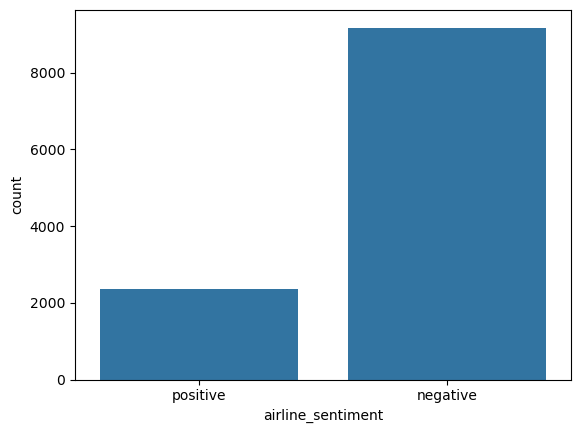

In [108]:
sns.countplot(tweets_df,x="airline_sentiment")
# dataset is imbalance


In [109]:
tweets_df["target"] = tweets_df["airline_sentiment"].map({
    "positive": 1,
    "negative":0
})
tweets_df.head(3)

,text,airline_sentiment,target
1,@VirginAmerica plus you've added commercials t...,positive,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [110]:
X_train,X_test,y_train,y_test = train_test_split(tweets_df["text"],tweets_df["target"])

In [111]:
print(len(X_train))
print(len(y_train))

8655
8655


In [112]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train_Vector = vectorizer.fit_transform(X_train)
X_test_Vector = vectorizer.transform(X_test)

In [113]:

X_train_Vector = X_train_Vector.toarray()
X_test_Vector = X_test_Vector.toarray()

In [114]:
X_train_Vector[0].shape

(2000,)

In [115]:
# creating model 

import tensorflow as tf

In [54]:
inputs = tf.keras.Input(shape=(2000,))
layer_1 = tf.keras.layers.Dense(4,activation="relu")(inputs)
output = tf.keras.layers.Dense(1,activation='sigmoid')(layer_1)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [74]:
model.compile(  
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[  
             "accuracy"
    ],  
    
    
)  

In [75]:
history = model.fit(X_train_Vector,y_train,epochs=50,validation_data=(X_test_Vector,y_test))

Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.7294 - val_loss: 5.2603
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9983 - loss: 0.0042 - val_accuracy: 0.7349 - val_loss: 5.3497
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9979 - loss: 0.0049 - val_accuracy: 0.7297 - val_loss: 5.3561
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.7328 - val_loss: 5.3223
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9983 - loss: 0.0045 - val_accuracy: 0.7245 - val_loss: 5.3896
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.7287 - val_loss: 5.5008
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.7294 - val_loss: 5.5803
Epoch 8/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9978 - loss: 0.0053 - val_accuracy: 0.

In [57]:
model.evaluate(X_test_Vector,y_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7333 - loss: 5.1734


[5.168057918548584, 0.7311157584190369]

In [58]:
y_pred =model.predict(X_test_Vector)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         8,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,029 (93.87 KB)

 Trainable params: 8,009 (31.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,020 (62.58 KB)

In [60]:
confusion_matrix(y_test,np.round(y_pred.flatten()))

array([[2025,  255],
       [ 521,   85]])

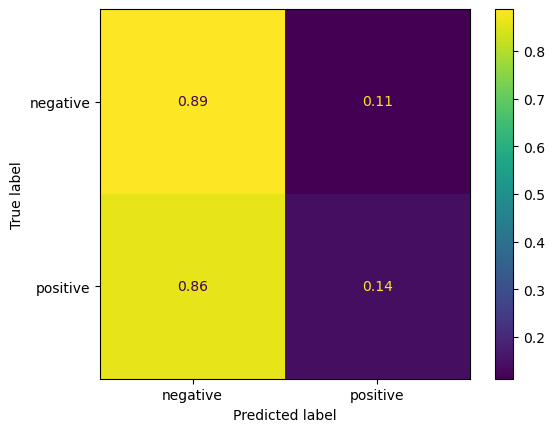

[[0.88815789 0.11184211]
 [0.85973597 0.14026403]]


In [ ]:

cm =confusion_matrix(y_test,np.round(y_pred.flatten()),normalize='true')
classes = ['negative',"positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()
print(cm)

In [34]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(2886,), dtype=float32, numpy=
array([0.00050515, 0.36533815, 0.00170257, ..., 0.02329246, 0.2569313 ,
       0.08609889], dtype=float32)>

In [ ]:
np.round(y_pred.flatten())

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [73]:
model.layers[1].get_weights()[0]

array([[-0.51353455,  1.1292088 , -1.0931336 ,  1.1856688 ],
       [ 0.04512073, -0.03606019,  1.0543379 , -0.06846382],
       [-0.21504821,  0.80922824, -1.1467805 ,  0.8821985 ],
       ...,
       [-0.22682549, -1.0479513 , -0.3035412 , -1.2700295 ],
       [ 1.9518821 ,  0.4478128 , -0.8737828 ,  0.25500453],
       [ 0.3522916 ,  0.70976573, -0.33391145,  0.6973545 ]],
      dtype=float32)

## Find ideal learning rate 

In [ ]:
def schedule(epoch):
    print(epoch)
    return 1e-3 * 10**(epoch/10)
lr_sch = tf.keras.callbacks.LearningRateScheduler(schedule)


model = tf.keras.Sequential([
    
    tf.keras.Input(shape=(2000,)),
    # tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])
model.compile(  
    optimizer=tf.keras.optimizers.Adam(0.01),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[  
             "accuracy"
    ],  
)  
history = model.fit( X_train_Vector,
                    y_train,
                    epochs=50,
                    validation_data=(X_test_Vector,y_test),
                    callbacks=[lr_sch]
                    )

0
Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7289 - loss: 0.6461 - val_accuracy: 0.7900 - val_loss: 0.5944 - learning_rate: 0.0010
1
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8008 - loss: 0.5016 - val_accuracy: 0.7900 - val_loss: 0.5426 - learning_rate: 0.0013
2
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7999 - loss: 0.4360 - val_accuracy: 0.7900 - val_loss: 0.5212 - learning_rate: 0.0016
3
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8095 - loss: 0.3939 - val_accuracy: 0.7900 - val_loss: 0.5131 - learning_rate: 0.0020
4
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8292 - loss: 0.3569 - val_accuracy: 0.7911 - val_loss: 0.5113 - learning_rate: 0.0025
5
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8479 - loss: 0.3286 - val_accuracy: 0.7900 - val_loss: 0.5108 - learning_rate: 0.0032
6
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8728 - l

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


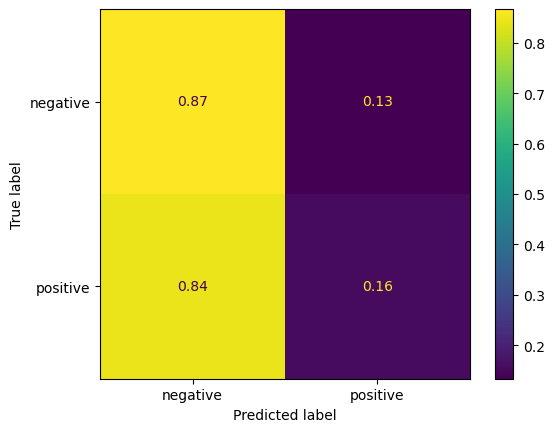

[[0.86666667 0.13333333]
 [0.84488449 0.15511551]]


In [82]:
y_pred =model.predict(X_test_Vector)
cm =confusion_matrix(y_test,np.round(y_pred.flatten()),normalize='true')
classes = ['negative',"positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()
print(cm)

Text(0, 0.5, 'loss')

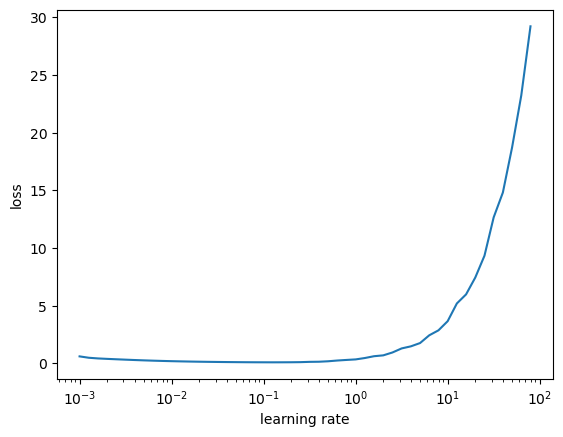

In [83]:
plt.semilogx(history.history["learning_rate"],history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")

In [116]:
model = tf.keras.Sequential([
    
    tf.keras.Input(shape=(2000,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])
model.compile(  
    optimizer=tf.keras.optimizers.Adam(0.001),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[  
             "accuracy"
    ],  
)  
history = model.fit( X_train_Vector,
                    y_train,
                    epochs=50,
                    # validation_data=(X_test_Vector,y_test),
                    )

Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7721 - loss: 0.5998
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8453 - loss: 0.3461
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9288 - loss: 0.2227
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9380 - loss: 0.1798
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9487 - loss: 0.1500
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9532 - loss: 0.1362
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9581 - loss: 0.1250
Epoch 8/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9598 - loss: 0.1122
Epoch 9/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9660 - loss: 0.1007
Epoch 10/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9680 - loss: 0.0947
Epoch 11/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9668 - loss: 0.0906
Epoch 12/50
271/271 ━━━━━━━━━━━━━━━━━━━━

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


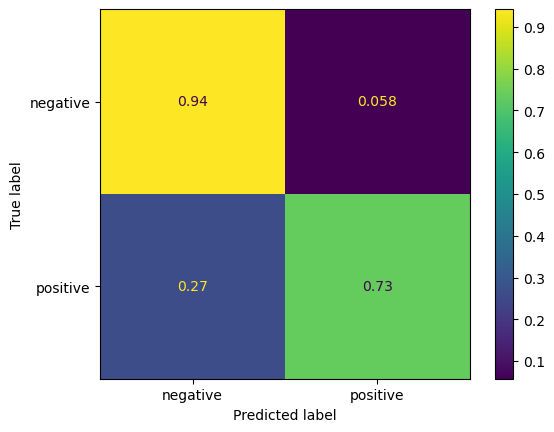

[[0.942156   0.057844  ]
 [0.26821192 0.73178808]]


In [118]:
y_pred =model.predict(X_test_Vector)
y_pred = (y_pred >= 0.5 ) * 1
cm =confusion_matrix(y_test,y_pred.flatten(),normalize='true')
classes = ['negative',"positive"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
disp.plot()
plt.show()
print(cm)

In [121]:
print(f"f1_Score: {f1_score(y_test,y_pred)}")

f1_Score: 0.7504244482173175


In [ ]:
print(f"AUC_Score: {roc_auc_score(y_test,y_pred)}")

AUC_Score: 0.8369720414879477
